In [1]:
import  matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [3]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

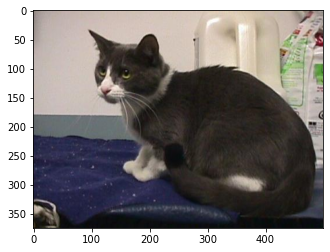

In [4]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog = cv2.imread('CATS_DOGS/train/DOG/4.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)


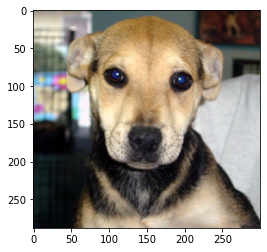

In [8]:
plt.imshow(dog)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
image_gen = ImageDataGenerator(rotation_range = 30,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1 / 255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode = 'nearest'
                              )

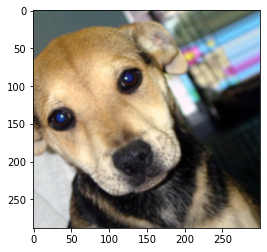

In [14]:
plt.imshow(image_gen.random_transform(dog))

In [18]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [24]:
from keras.models import Sequential

In [26]:
from keras.layers import Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Dense

In [28]:
model = Sequential()

model.add(Conv2D(filters= 32, kernel_size = (3, 3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters= 32, kernel_size = (3,3), input_shape = (150, 150, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) #randomly turn off x% of neurons

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)      

In [33]:
batch_size = 16
input_shape = (150, 150, 3)
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                                target_size = input_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'binary'
                                                )

Found 18743 images belonging to 2 classes.


In [34]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                                target_size = input_shape[:2],
                                                batch_size = batch_size,
                                                class_mode = 'binary'
                                                )

Found 6251 images belonging to 2 classes.


In [35]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [38]:
results = model.fit_generator(train_image_gen,
                              epochs = 15,
                              steps_per_epoch = 150,
                              validation_data = test_image_gen,
                              validation_steps = 12)

C:\Users\Mustafa\AppData\Local\Temp/ipykernel_816/2470412977.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_image_gen,


Epoch 1/15
150/150 [==============================] - 136s 900ms/step - loss: 0.6963 - accuracy: 0.5146 - val_loss: 0.6918 - val_accuracy: 0.5260
Epoch 2/15
150/150 [==============================] - 109s 727ms/step - loss: 0.6951 - accuracy: 0.5067 - val_loss: 0.6895 - val_accuracy: 0.5781
Epoch 3/15
150/150 [==============================] - 97s 643ms/step - loss: 0.6911 - accuracy: 0.5208 - val_loss: 0.6811 - val_accuracy: 0.6198
Epoch 4/15
150/150 [==============================] - 109s 726ms/step - loss: 0.6776 - accuracy: 0.6017 - val_loss: 0.6874 - val_accuracy: 0.6198
Epoch 5/15
150/150 [==============================] - 92s 612ms/step - loss: 0.6771 - accuracy: 0.5925 - val_loss: 0.6393 - val_accuracy: 0.6354
Epoch 6/15
150/150 [==============================] - 90s 597ms/step - loss: 0.6626 - accuracy: 0.6087 - val_loss: 0.6275 - val_accuracy: 0.6667
Epoch 7/15
150/150 [==============================] - 88s 586ms/step - loss: 0.6584 - accuracy: 0.6204 - val_loss: 0.6550 - val

C:\Users\Mustafa\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


150/150 [==============================] - 159s 1s/step - loss: 0.6515 - accuracy: 0.6313 - val_loss: 0.6047 - val_accuracy: 0.6875
Epoch 14/15
150/150 [==============================] - 155s 1s/step - loss: 0.6374 - accuracy: 0.6267 - val_loss: 0.6081 - val_accuracy: 0.6771
Epoch 15/15
150/150 [==============================] - 152s 1s/step - loss: 0.6375 - accuracy: 0.6413 - val_loss: 0.6402 - val_accuracy: 0.6562


In [39]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
results.history['accuracy']

[0.5145833492279053,
 0.5066666603088379,
 0.5208333134651184,
 0.6016666889190674,
 0.5924999713897705,
 0.6087499856948853,
 0.6204166412353516,
 0.6254166960716248,
 0.6387500166893005,
 0.6345833539962769,
 0.6254166960716248,
 0.6262500286102295,
 0.6312500238418579,
 0.6266666650772095,
 0.6412500143051147]

In [47]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

In [48]:
from keras.preprocessing import image

In [49]:
dog_img = image.load_img(dog_file, target_size= (150, 150))

In [50]:
dog_img = image.img_to_array(dog_img)

In [51]:
dog_img.shape

(150, 150, 3)

In [52]:
import numpy as np 
dog_img = np.expand_dims(dog_img, axis = 0)

In [53]:
dog_img.shape

(1, 150, 150, 3)

In [54]:
dog_img = dog_img / 255

In [56]:
model.predict(dog_img)

array([[0.7103934]], dtype=float32)